# Energy Requirements of Aluminum Frames MFGing
This journal documents the processing of literature data of the manufacturing energy of aluminum frames, from mining through extrusion, and recycling.

In [1]:
import numpy as np
import pandas as pd
import os,sys
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = (10, 6)
cwd = os.getcwd() #grabs current working directory

### Aluminum LCI 2019
This is a nice LCI/LCA from the International Aluminum Inst. updated in 2019. Pulling all the details in here.

In [6]:
pd.read_excel(cwd+"/../../../PV_ICE/baselines/SupportingMaterial/InternationalAluminumInst-2019-LCI-energyGLO.xlsx")

,Unnamed: 0,Unnamed: 1,Bauxite mining,Alumina production,Paste,Anode,Electrolysis (S),Electrolysis (P),Casting,Unnamed: 9,SUM,Unnamed: 11
0,Energy input,NaN,NaN,NaN,NaN,NaN,stroberg 5%,prebake (95% marketshare),NaN,NaN,NaN,NaN
1,Heavy oil,MJ/t product,5.732475,842.034192,469.825029,559.321050,NaN,NaN,69.184075,NaN,NaN,NaN
2,Natural gas,MJ/t product,1.099623,2477.888492,53.596036,2097.355115,NaN,NaN,743.893708,NaN,NaN,NaN
3,Coal,MJ/t product,21.927162,6414.449581,0.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN
4,Electricity,MJ/t product,22.971227,546.871252,396.447536,465.725257,60410.055312,51010.365432,392.943916,NaN,53305.309113,electricty sum
5,Other,MJ/t product,0.006372,168.263584,0.000000,116.020414,NaN,NaN,32.142607,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,All but mining,CED all energy sources,NaN
7,SUM,NaN,51.736859,10449.507101,919.868601,3238.421836,60410.055312,51010.365432,1238.164305,67326.311769,67378.048628,NaN
8,% of overall energy step,NaN,0.000768,0.155088,0.013652,0.048063,0.044829,0.719223,0.018376,NaN,0.791138,% electricity
9,% Fuel each step,NaN,0.555999,0.947665,0.569017,0.856188,0,0,0.682640,0.208596,0.208862,% fuels


This resource also has timelines of energy demand of the two most energy intensive steps over time.

In [13]:
#alumina to aluminum
IAI_alumina_raw = pd.read_csv(cwd+"/../../../PV_ICE/baselines/SupportingMaterial/InternationalAluminumInst-1995-2021-PrimaryAluminaRefineEnergy-MJpTonne.csv",
                                     index_col='year')
IAI_alumina_raw

,Africa & Asia (ex China),North America,South America,Europe,Oceania,China,World
year,,,,,,,
1995,15065,12528,12794,12094,12301,NaN,12621
1996,16455,12668,12580,11987,12213,NaN,12637
1997,16356,11356,12052,12191,12269,NaN,12339
1998,17468,11025,12144,13031,12126,40632.0,14919
1999,17106,11273,11709,12883,11964,38278.0,14774
2000,16687,11654,11903,12627,11370,35644.0,14479
2001,28080,20448,19915,26066,22250,44746.0,24931
2002,12938,11957,11436,13490,11375,33948.0,14554
2003,14536,10927,11112,12312,11745,32612.0,14193


In [21]:
IAI_alumina_kwhpkg = (IAI_alumina_raw*0.2777)/1000 #convert from MJ/tonne to kWh/kg
IAI_alumina_kwhpkg.loc[2001] = np.nan# drop the weirdness at 2001
IAI_alumina_kwhpkg.interpolate(inplace=True) #replace with interpolated data

Text(0, 0.5, 'kWh/kg')

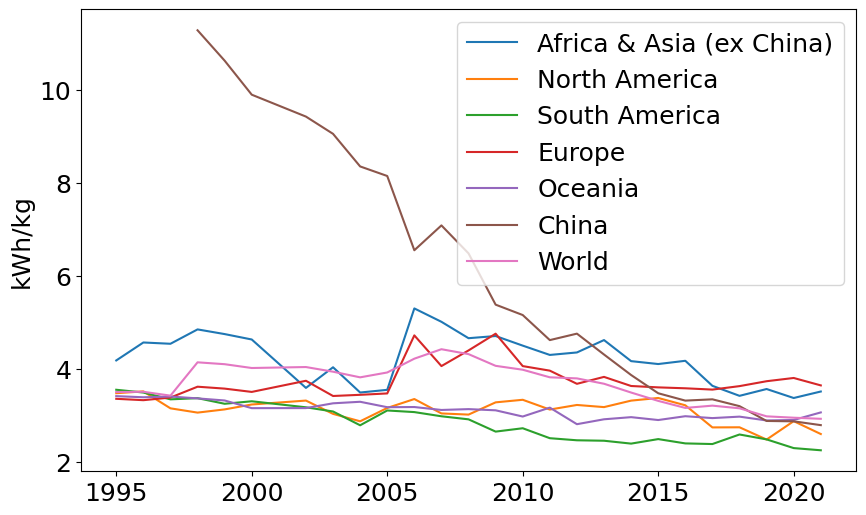

In [22]:
plt.plot(IAI_alumina_kwhpkg)
plt.legend(IAI_alumina_kwhpkg.columns)
plt.ylabel('kWh/kg')

In [9]:
#Smelting energy
pd.read_csv(cwd+"/../../../PV_ICE/baselines/SupportingMaterial/InternationalAluminumInst-1995-2021-PrimaryAlSmeltEnergy-kWhpTonne.csv",
                                     index_col='year')

,Type,Africa,North America,South America,Asia (ex China),Europe,Oceania,Gulf Cooperation Council,China,World
year,,,,,,,,,,
1995,Total Energy (AC),15817.0,16048.0,15607.0,16114.0,15603.0,15238.0,NaN,16600,15878.0
1995,Process Energy (DC),NaN,NaN,NaN,NaN,NaN,NaN,NaN,14530,NaN
1996,Total Energy (AC),15238.0,15984.0,15678.0,15821.0,15440.0,15231.0,NaN,16065,15718.0
1996,Process Energy (DC),NaN,NaN,NaN,NaN,NaN,NaN,NaN,14487,NaN
1997,Total Energy (AC),15132.0,15985.0,15654.0,15765.0,15619.0,15187.0,NaN,15858,15711.0
1997,Process Energy (DC),NaN,NaN,NaN,NaN,NaN,NaN,NaN,14178,NaN
1998,Total Energy (AC),15084.0,15940.0,15958.0,15831.0,15548.0,15259.0,NaN,15473,15679.0
1998,Process Energy (DC),NaN,NaN,NaN,NaN,NaN,NaN,NaN,14123,NaN
1999,Total Energy (AC),15024.0,15371.0,15340.0,15323.0,15193.0,14852.0,NaN,15603,15282.0


## Bauxite Mining

In [7]:
#skipcols = ['Source', 'Notes','Country']
e_mineAl_raw = pd.read_csv(cwd+"/../../../PV_ICE/baselines/SupportingMaterial/energy-input-aluminum-mining.csv",
                                     index_col='year')#, usecols=lambda x: x not in skipcols)

In [8]:
e_mineAl_raw.dropna(how='all')

,E_mine_kWhpkg,Prct_fuel,Source,Notes
year,,,,
2003,0.32000,NaN,U.S. Energy Requirements for Aluminum Producti...,"pg 29/14, bauxite mining, 16.7 kg CO2"
2011,9.72195,NaN,"Norgate, Terry, and Sharif Jahanshahi. 2011. “...","Al mining and mineral processing, embodied E"
2018,51.70000,56%,World Aluminium — Primary Aluminium Production...,"calculations from 2019 LCI, see excel GLO, rem..."
2019,0.00039,"mostly fuels, some electricity","Farjana, S.H., Huda, N. and Mahmud, M.A.P. (20...","bauxite mining, electricity shown, mostly fuels"
2020,1.13000,NaN,"Farjana, S.H., Huda, N. and Mahmud, M.A.P. (20...",Table 7 bauxite hhv


So this is a massively wide range. I have confidence in the International Aluminum Inst. LCI, but it is also the highest value. However, when compared to the other numbers from that report, it is still <1% of the overall energy demand

## Alumina Production

## Aluminum Smelting

## Casting, Extruding, Anodizing

## Cumulative Energy Demand Comparison

## Recycling

In [11]:
#skipcols = ['Source', 'Notes','Country']
e_recycleAl_raw = pd.read_csv(cwd+"/../../../PV_ICE/baselines/SupportingMaterial/energy-input-aluminum-recycle.csv",
                                     index_col='year')#, usecols=lambda x: x not in skipcols)

In [12]:
e_recycleAl_raw.dropna(how='all')

,E_recycle_kWhpkg,Source,Notes
year,,,
1975,1.650000,"Bravard, J. C., H. B. Flora, and Charles Porta...","<5% of virgin ore, likely includes thermal"
1976,1.820000,"Bravard, J. C., H. B. Flora, and Charles Porta...",NaN
1977,1.680000,"Bravard, J. C., H. B. Flora, and Charles Porta...","page 18, re-melt and pre processing Al scrap"
1978,4.860000,"Rankin, John. 2012. “Energy Use in Metal Produ...","secondary production, 5-10% of primary product..."
2003,2.800000,U.S. Energy Requirements for Aluminum Producti...,"page 64/79, thermal energy"
2006,NaN,"Plunkert, P.A. (2006) Aluminum Recycling in th...","cites a DOE 2003 report, 5%-8% of PED"
2014,8.610870,"Goe, Michele, and Gabrielle Gaustad. 2016. “Es...",NaN
2017,2.222216,"Strachala, Dávid, Josef Hylskỳ, Jiří Vaněk, Gü...","includes thermal and electrical energy, yield ..."
2020,4.972083,"Camaratta, R., Volkmer, T.M. and Osorio, A.G. ...",unknown source


The regular reported energy savings is that recycling is only ~5% of primary Al production. So either I can use these raw data, OR can take 5% of the CED of Al MFGing energy